In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#graphic function

def martriz_of_confusion(real_classes, predicted_classes, title):
  #""" preview the confusion matriz ""
  matriz = confusion_matrix(real_classes, predicted_classes)
  accuracy = accuracy_score(real_classes, predicted_classes)

  # #code of matplotlib to grafic
  plt.figure(figsize=(4,4))
  matriz = pd.DataFrame(matriz,
                        columns=["0: healty", "1: Cancaer"])

  plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
  plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
  plt.yticks(range(len(matriz.columns)), matriz.columns)

  tags = (("True \nNegatives", "False \nPositives"),
          ("False\nNegatives", "True \nPositives"))

  plt.text(1.60, -0.30, title, fontsize=25, c="red")
  plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)

  for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
      plt.text(i,j + 0.14, str(matriz.iloc[i, j]),
               fontsize=30, ha="center", va="center")
      plt.text(i,j - 0.25,  tags[i][j],
               fontsize=11.5, ha="center", va="center")
  plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

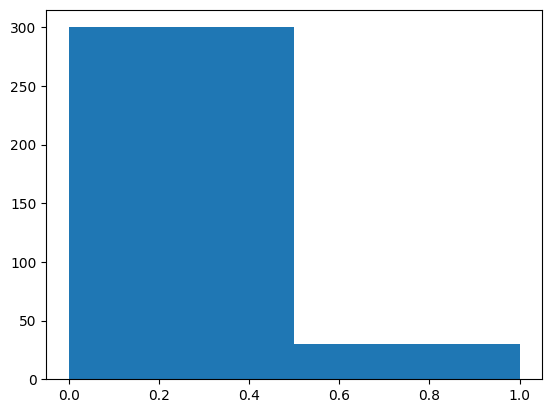

In [103]:
#university of wisconsin, clinical sciences center
info = np.loadtxt("cancer.csv", delimiter=",", unpack=True)

#30 features: radio, texture, area behind others
myData = info[:-1].T

#0: healty 1:cancer
myClass = info[-1]

plt.hist(myClass, bins=2)
plt.show

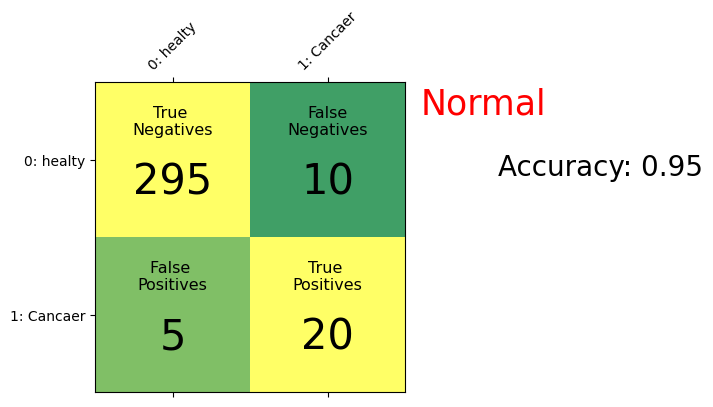

In [104]:
#assignation of weights and clases
myModel = LogisticRegression().fit(myData, myClass)
martriz_of_confusion(myClass, myModel.predict(myData), "Normal")

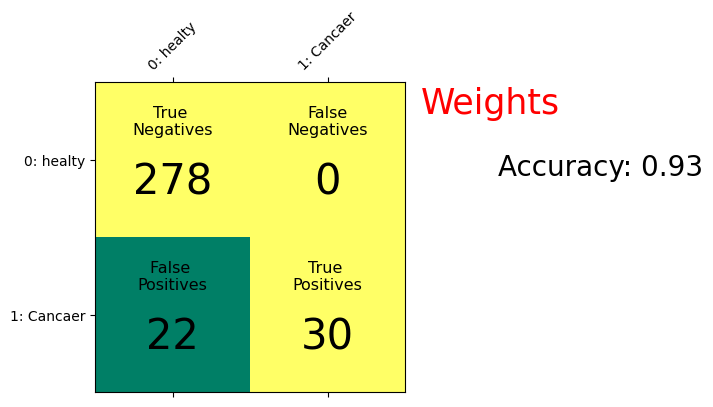

In [106]:
#assignation of weights and clases (putting weight)
myModel = LogisticRegression(class_weight={0:1, 1:100}).fit(myData, myClass)
martriz_of_confusion(myClass, myModel.predict(myData), "Weights")

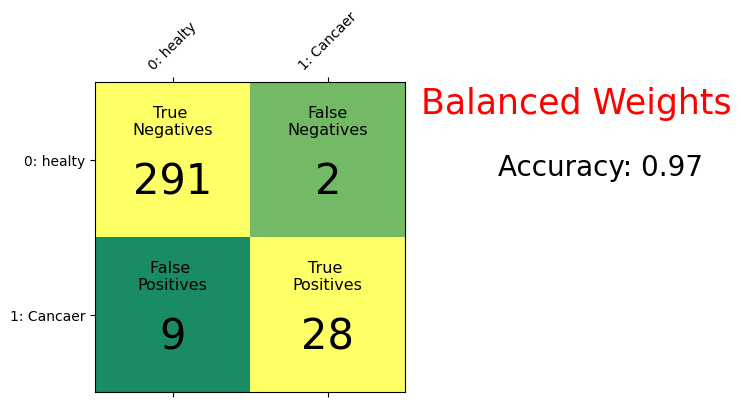

In [108]:
#assignation of weights and clases (putting balanced weight)
myModel = LogisticRegression(class_weight="balanced").fit(myData, myClass)
martriz_of_confusion(myClass, myModel.predict(myData), "Balanced Weights")

0.55 5.5


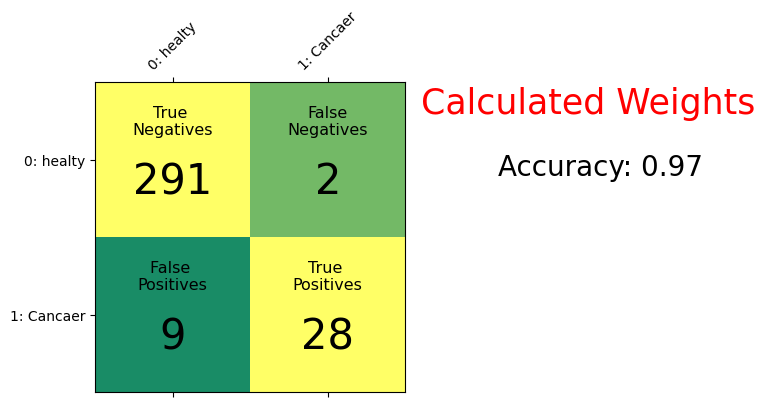

In [113]:
print(330/(2*300), 330/(2*30))
#assignation of weights and clases (putting calculadted)
myModel = LogisticRegression(class_weight={0:0.55, 1: 5.5}).fit(myData, myClass)
martriz_of_confusion(myClass, myModel.predict(myData), "Calculated Weights")